QUESTION 1

In [52]:
from sklearn import datasets

digits = datasets.load_digits()

In [53]:
print(digits.data.shape)

(1797, 64)


In [54]:
# split the data into training and validation sets in an 80/20 ratio
from sklearn.model_selection import train_test_split
X = digits.data # features
y = digits.target # target

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
# before we train the model, we need to scale the data (standardize the features) so that all features are uniform and contribute equally to the final product (the prediction)

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # create the scaler object

In [58]:
X_train_std = scaler.fit_transform(X_train) # fit the scaler to the training data and transform it
X_test_std = scaler.transform(X_test) # transform the test data

In [59]:
# now before training the model we should find the optimal value for K using cross-validation
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# create a list of K values to test
k_list = list(range(1, 20, 2)) # odd numbers from 1 to 20

In [60]:
# perform 10-fold cross-validation for each K value
from sklearn.neighbors import KNeighborsClassifier
cv_scores = [] # create an empty list to store the cross-validation scores

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k) # create a KNN classifier with K neighbors
    scores = cross_val_score(knn, X_train_std, y_train, cv=10, scoring='accuracy') # perform 10-fold cross-validation
    cv_scores.append(scores.mean()) # append the mean of the cross-validation scores to the list

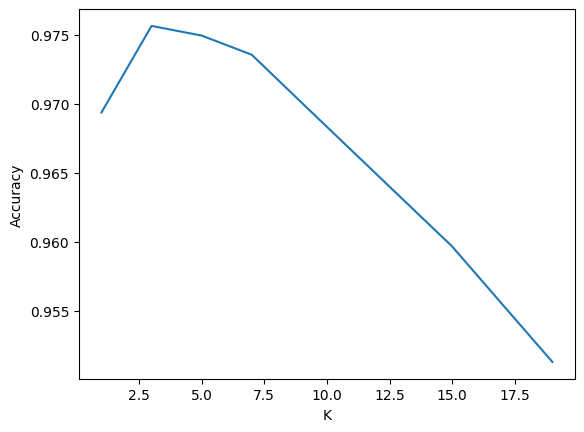

In [61]:
# plot the accuracy vs K values
plt.plot(k_list, cv_scores)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

In [62]:
optimal_k = k_list[cv_scores.index(max(cv_scores))] # find the optimal K value (the one with the highest accuracy)

In [63]:
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 3


In [64]:
# we will use k = 3 to train our model now based on the results of the cross-validation above
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train_std, y_train) # train the model

KNeighborsClassifier(n_neighbors=3)

In [65]:
# now we can use the model to make predictions on the test data
y_pred = knn.predict(X_test_std)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.93      1.00      0.97        28
           2       0.94      0.97      0.96        33
           3       0.97      0.97      0.97        34
           4       0.98      1.00      0.99        46
           5       0.98      0.96      0.97        47
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        34
           8       0.97      0.93      0.95        30
           9       0.95      0.90      0.92        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

Confusion Matrix:
 [[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  1 32  0  0  0  0  0  0  0]
 [ 0  0  1 33  0  0  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 45  1  0  0  1]


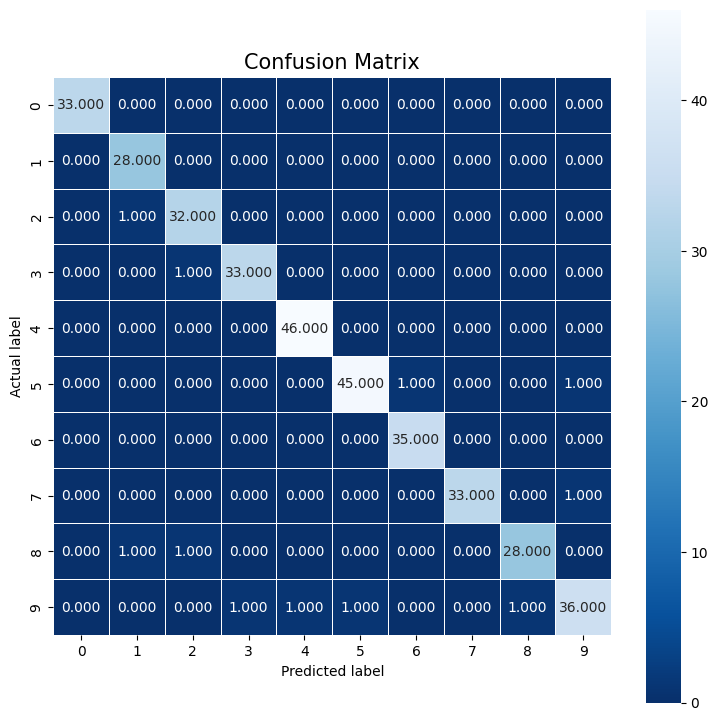

In [66]:
# evaluate the model's performance (we will use multiple metrics)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:\n", accuracy_score(y_test, y_pred))

# plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix', size = 15);
plt.show()

Explanation:
Precision: The ability of the classifier not to label as positive a sample that is negative. For each class it is defined as the ratio of true positives to the sum of true and false positives. High precision means that an algorithm returned substantially more relevant results than irrelevant ones.

Recall: The ability of the classifier to find all the positive samples. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives. High recall means that an algorithm returned most of the relevant results.

F1-score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal.

Support: The number of samples of the true response that lie in that class.

Accuracy: T simplest way to evaluate and it is simply a ratio of correctly predicted observation to the total observations. The model above achieved approximately 0.97, which is exceptional.

The Confusion Matrix provides a more detailed breakdown of correct and incorrect classifications for each class. The rows of the matrix represent the actual class and the columns represent the predicted class. The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions. The model seems to have a bit more difficulty with digit 9, where it has made a few misclassifications.

In [67]:
# print the number of misclassified samples (the number of samples for which the predicted class is not equal to the true class)
print("Number of misclassified samples: %d" % (y_test != y_pred).sum())

Number of misclassified samples: 11


In [68]:
# print the total number of samples
print("Total number of samples: %d" % len(y_test))

Total number of samples: 360


In [69]:
# ratio of misclassified samples to the total number of samples (error rate)
print("Error rate: %.2f" % ((y_test != y_pred).sum() / len(y_test)))

Error rate: 0.03


The results from week 7 are as follows:

KNN:
Accuracy of k-NN on original data:  0.975
Accuracy of k-NN on PCA-transformed data:  0.6805555555555556

SVM with RBF kernel:
Accuracy:  0.7277777777777777
Classification report:
               precision    recall  f1-score   support

           0       0.90      0.85      0.88        33
           1       0.81      0.79      0.80        28
           2       0.87      0.82      0.84        33
           3       0.71      0.59      0.65        34
           4       0.98      0.93      0.96        46
           5       0.37      0.21      0.27        47
           6       1.00      0.97      0.99        35
           7       0.72      0.82      0.77        34
           8       0.45      0.70      0.55        30
           9       0.56      0.72      0.63        40

    accuracy                           0.73       360
   macro avg       0.74      0.74      0.73       360
weighted avg       0.73      0.73      0.72       360

Best hyperparameters:  {'C': 10, 'gamma': 0.1}

In comparison to this weeks results they were very similar with 0.97 versus 0.975 on the original data. With PCA transformation using 3 componenets it lowered significantly to 0.68 while SVM with RBF kernel only achieved 0.73 (rounded up to 2 decimal places).

QUESTION 2

In [70]:
# now we will use a decision tree algorithm to classify the data in both a 50/50 and 70/30 split and compare the results to the KNN algorithm above in question 1

In [71]:
# re import the data so we can start fresh
digits = datasets.load_digits() # load the data again (we will use the original data without PCA transformation)

In [72]:
# split the data into features and target
X = digits.data
y = digits.target

In [73]:
# in the previous KNN example we used standardization to scale the data, but this is not necessary for decision trees as they are not sensitive to the scale of the features. However, we will still split the data into training and test sets in the desired ratios of 50/50 and 70/30. Decision trees work by recursively splitting the dataset along the feature values that give maximum information gain or impurity reduction. Since the model only considers whether the feature value is above or below a certain threshold, the scale of the feature has no impact on the model's accuracy.

In [74]:
# data split: 50-50%
X_train_50, X_test_50, y_train_50, y_test_50 = train_test_split(X, y, test_size=0.5, random_state=42)

# data split: 70-30%
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X, y, test_size=0.3, random_state=42)

In [75]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# train the Decision Tree classifiers
dt_50 = DecisionTreeClassifier()
dt_70 = DecisionTreeClassifier()

In [76]:
# fit the models
dt_50.fit(X_train_50, y_train_50)
dt_70.fit(X_train_70, y_train_70)

DecisionTreeClassifier()

In [77]:
# make predictions
y_pred_50 = dt_50.predict(X_test_50)
y_pred_70 = dt_70.predict(X_test_70)

In [78]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# calculate and print accuracy, classification report, and confusion matrix for the 50-50 split
accuracy_50 = accuracy_score(y_test_50, y_pred_50)
print("Accuracy with 50-50 split:", accuracy_50)

report_50 = classification_report(y_test_50, y_pred_50)
print("Classification report for 50-50 split:")
print(report_50)

confusion_50 = confusion_matrix(y_test_50, y_pred_50)
print("Confusion matrix for 50-50 split:")
print(confusion_50)

# do the same for the 70-30 split
accuracy_70 = accuracy_score(y_test_70, y_pred_70)
print("\nAccuracy with 70-30 split:", accuracy_70)

report_70 = classification_report(y_test_70, y_pred_70)
print("Classification report for 70-30 split:")
print(report_70)

confusion_70 = confusion_matrix(y_test_70, y_pred_70)
print("Confusion matrix for 70-30 split:")
print(confusion_70)


Accuracy with 50-50 split: 0.8409343715239155
Classification report for 50-50 split:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96        82
           1       0.81      0.74      0.78        89
           2       0.82      0.90      0.86        83
           3       0.83      0.76      0.79        93
           4       0.87      0.89      0.88        93
           5       0.78      0.81      0.79        99
           6       0.90      0.90      0.90        98
           7       0.88      0.93      0.91        87
           8       0.73      0.69      0.71        83
           9       0.82      0.84      0.83        92

    accuracy                           0.84       899
   macro avg       0.84      0.84      0.84       899
weighted avg       0.84      0.84      0.84       899

Confusion matrix for 50-50 split:
[[78  1  1  0  0  1  1  0  0  0]
 [ 2 66  2  1  4  6  4  0  3  1]
 [ 0  1 75  2  0  0  0  0  5  0]
 [ 0  1  6 71  0  3  0 

Analysis of the results:

For the 50-50 split:
The overall accuracy of the model is approximately 84%, which means the model correctly predicted the class 84% of the time.
The precision, recall, and F1-score for each class vary. For instance, the model performs best on class 0 with a precision, recall, and F1-score all close to 96%. This means the model is very good at predicting and correctly classifying this class.
The model seems to struggle a bit more with class 8, with precision, recall, and F1-score all around 73-71%. This means the model is less accurate and less reliable when predicting this class.
The confusion matrix shows that most predictions fall on the diagonal (correct predictions), with some misclassifications. For example, class 3 is sometimes misclassified as class 8 and class 9.

For the 70-30 split:
The overall accuracy of the model is also approximately 84%, very similar to the 50-50 split model.
The precision, recall, and F1-score for each class again vary. The model performs best on class 0 with a precision, recall, and F1-score all close to 100%, 89%, and 94% respectively.
The model seems to struggle a bit more with class 1, with precision, recall, and F1-score all around 74-64-69%. This means the model is less accurate and less reliable when predicting this class.
The confusion matrix again shows that most predictions fall on the diagonal (correct predictions), with some misclassifications. For example, class 1 is sometimes misclassified as class 2 and class 4.
Comparing the two models, the performance is very similar despite the different data splits. This suggests that the model is relatively stable and not overly sensitive to the exact proportion of the data split. However, it's important to note that the model's performance can vary for different classes. In both models, the model performs best on class 0 and struggles more with class 8 or 1. This could be due to the characteristics of the data or the limitations of the Decision Tree algorithm.